# **_Analysis on the Financial Impact Seasons have on Film Revenue_**

![4fxxbm4opjd31](https://user-images.githubusercontent.com/35352010/157860163-2adce849-0d84-4e6e-8a6b-0795f9457497.jpeg)


### Chelcie De Almeida

### 10 March 2022

## Introduction

The Analysis on the Financial Impact Seasons Have on Film Revenue attempts to look at the highest grossing films in the past 30 years with the objective of determining if film studios knowingly release movies on any given season understanding the impact it may have on their revenue.

I'm a long time film aficionado that spent a generous amount of time at the movie theater especially during the colder seasons but once I moved to the U.S, I noticed a change in those habits as I started going to the theater more frequently during warmer months particularly in consideration for the types of movies I enjoy watching at the theater which interestingly enough are often major block busters. 

Therein, lies the motive and objective behind this analysis. I'm interested in determining in which seasons do movies profit/Gross most as it is my hunch that colder seasons are the most lucrative for film studios. I predict that the data will deny my hypothesis in the Northern Hemisphere (U.S market) but may favor it in the Southern Hemisphere.

## Data Explained

The sources used for this project can be found in the following links:
* https://datasets.imdbws.com/
* https://www.the-numbers.com/movie/budgets

Initially, the analysis started with 3 separate files, (2) IMDB, (1) The Numbers which outlined:
1. Movie Budgets for the 8000 highest grossing films broken down by production cost, domestic gross, and worldwide gross (The Numbers)
2. Movie runtimes, genre, various titles (IMDB)
3. Title of the film, the region of the film relative to title, language and the format type of the media

During the EDA phase of the analysis, it was discovered that File 3 of which the data of interest was genre and runtime minutes couldn't be utilized as they compromised data integrity by causing a high volume of duplicates considering both The Numbers sources and the UMDB sources would be merged by movie names. The Genre column had multiple genres for each record making it near impossible to produce any actionable insight reliant on its values. 
IMDB sources also included formats that were not film such as Tv series, streaming media, animation, and shorts etc. that needed to be removed from the dataset.

In addition, the data was constrained to the 30 thirty years between 1990 and 2021 as 2022 data is still being compiled, and all references to unreleased films that had populated financials also needed to be removed from the dataset. 

The following image is the seasons conversion in relation to Northern vs Southern Hemisphere.

<b>NOTE:</b>

Southern hemisphere often refers to Fall as Autumn but for the purposes of this analysis, we're using 'Fall' interchangeably. We're only focusing on the commonly used Meteorological terms and not the astronomical terms.
    
<img width="1012" alt="Screen Shot 2022-03-12 at 12 23 49 AM" src="https://user-images.githubusercontent.com/35352010/158010264-e97d5ece-e3ae-49cf-bb28-7b5b0bc93455.png">


The following is the finalized version of the data dictionary that describes the data objects that this analysis will use to present its findings

### Data Dictionary

| Column Name        | Column Description                                           | Data Type |
|--------------------|--------------------------------------------------------------|-----------|
| Release Date       | Date the movie was released                                  | Date      |
| Movie              | Name of the movie                                            | String    |
| Production Budget  | The cost to produce the movie                                | Integer   |
| Domestic Gross     | Domestic gross revenue                                       | Integer   |
| Worldwide Gross    | Worldwide gross revenue including domestic revenue           | Integer   |
| Gross Profit       | Gross profit is the worldwide gross - production budget      | Integer   |
| Non-Domestic Gross | Gross revenue excluding US generated revenue                 | Integer   |
| month              | Month the movie was released                                 | String    |
| year               | Year the movie was released                                  | Integer   |
| Season_N_Hemis     | The season the movie was released in the northern hemisphere | String    |
| Season_S_Hemis     | The season the movie was released in the southern hemisphere | String    |

## Results

In [77]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline
# Set up notebook to display multiple outputs in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [37]:
# Read in file produced for 
film_df = pd.read_csv('highGrossmoviesFinal.csv')

film_df.info()
film_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4115 entries, 0 to 4114
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Release Date        4115 non-null   object
 1   Movie               4115 non-null   object
 2   Production Budget   4115 non-null   int64 
 3   Domestic Gross      4115 non-null   int64 
 4   Worldwide Gross     4115 non-null   int64 
 5   Gross Profit        4115 non-null   int64 
 6   Non-Domestic Gross  4115 non-null   int64 
 7   month               4115 non-null   int64 
 8   year                4115 non-null   int64 
 9   Season_N_Hemis      4115 non-null   object
 10  Season_S_Hemis      4115 non-null   object
dtypes: int64(7), object(4)
memory usage: 353.8+ KB


,Release Date,Movie,Production Budget,Domestic Gross,Worldwide Gross,Gross Profit,Non-Domestic Gross,month,year,Season_N_Hemis,Season_S_Hemis
0,2019-04-23,Avengers: Endgame,400000000,858373000,2797800564,2397800564,1939427564,4,2019,Spring,Fall
1,2011-05-20,Pirates of the Caribbean: On Stranger Tides,379000000,241071802,1045713802,666713802,804642000,5,2011,Spring,Fall
2,2015-04-22,Avengers: Age of Ultron,365000000,459005868,1395316979,1030316979,936311111,4,2015,Spring,Fall
3,2018-04-25,Avengers: Infinity War,300000000,678815482,2048359754,1748359754,1369544272,4,2018,Spring,Fall
4,2017-11-13,Justice League,300000000,229024295,655945209,355945209,426920914,11,2017,Fall,Spring


### Boxplot results

The results appear to show that summer releases are strongest in the US with some outliers and the correspoding Winter in the southern hemisphere also appears to support the consistency in gross. It also appears that the spring and fall relationship may be stronger assuming outliers aren't tipping the scales.

<Figure size 936x360 with 0 Axes>

<Figure size 936x360 with 0 Axes>

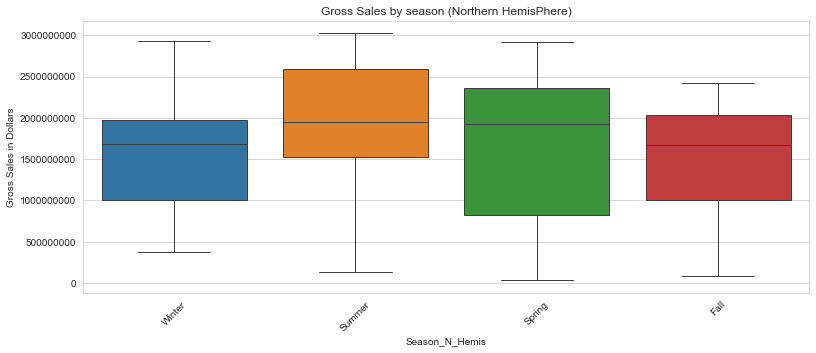

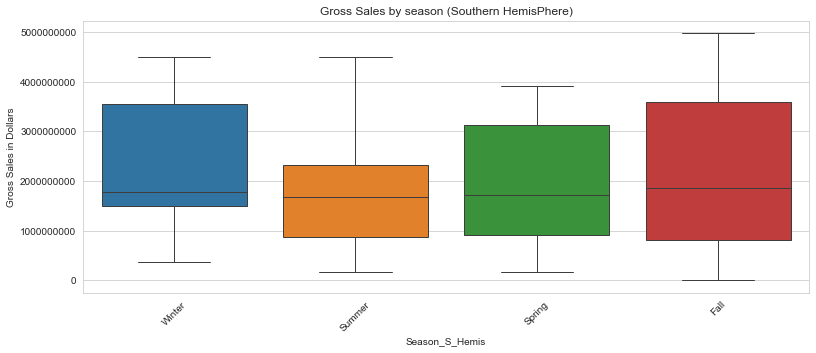

In [53]:
nBox = film_df.groupby(['year','Season_N_Hemis']) \
.agg({'Worldwide Gross': 'sum', 'Domestic Gross':'sum', 'Non-Domestic Gross':'sum', 'Gross Profit': 'sum'}) \
.sort_values(by = ['year'] , ascending=False).reset_index()

sBox = film_df.groupby(['year','Season_S_Hemis']) \
.agg({'Worldwide Gross': 'sum', 'Domestic Gross':'sum', 'Non-Domestic Gross':'sum', 'Gross Profit': 'sum'}) \
.sort_values(by = ['year'] , ascending=False).reset_index()

plt.figure(figsize = (13,5))
ax = sns.set_style("whitegrid")
ax = sns.boxplot(x = 'Season_N_Hemis', y = 'Domestic Gross',data = nBox, linewidth=1)
ax = ax.set_ylabel("Gross Sales in Dollars", fontsize = 10)
ax = plt.title('Gross Sales by season (Northern HemisPhere)')
ax = plt.xticks(rotation=45)
ax = plt.ticklabel_format(style='plain', axis='y')

plt.figure(figsize = (13,5))
ax = sns.set_style("whitegrid")
ax = sns.boxplot(x = 'Season_S_Hemis', y = 'Non-Domestic Gross',data = sBox, linewidth=1)
ax = ax.set_ylabel("Gross Sales in Dollars", fontsize = 10)
ax = plt.title('Gross Sales by season (Southern HemisPhere)')
ax = plt.xticks(rotation=45)
ax = plt.ticklabel_format(style='plain', axis='y')

### Comparison of the Southern vs Northern Hemisphere Gross Revenue

* It's expected that the Non-Domestic figures are greater than Domestic since international markets are larger
  and while the data appears to support the original prediction, it appears that the difference in gross for 2021
  between Domestic/Non-Domestic is not that wide relative to population sizes
* Movie gross revenue when it is Spring in the Northern Hemisphere and Fall in the Southern Hemisphere are also relatively high in comparison to the Winter/Summer relationship the analysis was originally focused. In fact, in 2019, the spring/fall relationship has the highest gross revenue between all combinations




In [50]:
northSouth = film_df.groupby(['year','Season_N_Hemis','Season_S_Hemis']) \
.agg({'Domestic Gross':'sum', 'Non-Domestic Gross':'sum'}) \
.sort_values(by = ['year'] , ascending=False).reset_index()
northSouth['Difference(%)'] = ((northSouth['Non-Domestic Gross'] - northSouth['Domestic Gross']) /northSouth['Domestic Gross']) * 100
northSouth.head(50)

,year,Season_N_Hemis,Season_S_Hemis,Domestic Gross,Non-Domestic Gross,Difference(%)
0,2021,Winter,Summer,1042736339,1431015855,37.236596
1,2021,Summer,Winter,522261116,592139398,13.379951
2,2021,Spring,Fall,338374926,742393730,119.399747
3,2021,Fall,Spring,1063523561,1641932841,54.386128
4,2020,Winter,Summer,488409967,598738499,22.589329
5,2020,Summer,Winter,132351315,363821907,174.891041
6,2020,Spring,Fall,31628458,16303625,-48.452672
7,2020,Fall,Spring,81989595,166842854,103.492716
8,2019,Winter,Summer,1547195276,2200991184,42.256845
9,2019,Summer,Winter,1946371658,3138435836,61.245455


### Scatterplot observations

The spring/fall relationship does appear to be strong but we do notice that there are some outliers around 2019 which is consistent with the above observation.

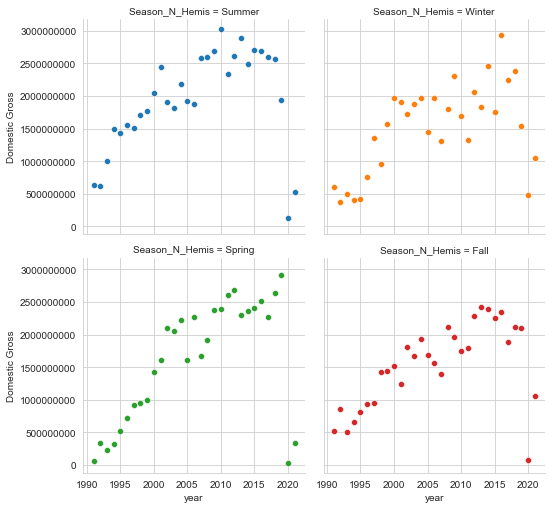

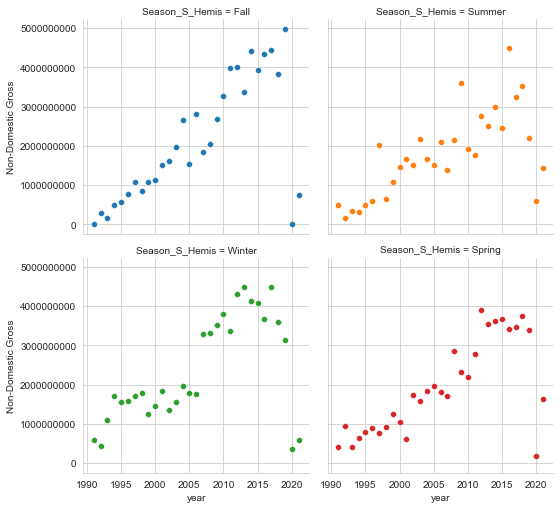

In [54]:
# creating scatterplots for domestic and non-domestic gross revenue in northern and southern hemisphere

# northern hemisphere
df_north = film_df.groupby(['Season_N_Hemis','year']) \
.agg({'Domestic Gross': 'sum'}) \
.sort_values(by = ['Domestic Gross'] , ascending=False).reset_index()

salesSeason = df_north
sns.set_style("whitegrid")
g = sns.FacetGrid(salesSeason, col="Season_N_Hemis", height=3.5, col_wrap=2, hue="Season_N_Hemis")
g.map_dataframe(sns.scatterplot, x="year", y="Domestic Gross")
plt.ticklabel_format(style='plain', axis='y')
g.set_axis_labels("year", "Domestic Gross")

# southern hemisphere
df_south = film_df.groupby(['Season_S_Hemis','year']) \
.agg({'Non-Domestic Gross': 'sum'}) \
.sort_values(by = ['Non-Domestic Gross'] , ascending=False).reset_index()

salesSeason = df_south
sns.set_style("whitegrid")
g = sns.FacetGrid(salesSeason, col="Season_S_Hemis", height=3.5, col_wrap=2, hue="Season_S_Hemis")
g.map_dataframe(sns.scatterplot, x="year", y="Non-Domestic Gross")
plt.ticklabel_format(style='plain', axis='y')
g.set_axis_labels("year", "Non-Domestic Gross")


### Gross Profit Relative to seasons

Based on the below output both my hunch and prediction seem to be partially accurate where profits are concerned although the  highest relationship is the 2019 spring/fall relationship we had noted earlier and the second highest profit is 2016 Winter/Summer relationship which is the inverse of my hunch, there still appears to be high consistency  of high profits when the relationship is summer/winter

In [57]:
profits = film_df.groupby(['year','Season_N_Hemis','Season_S_Hemis']) \
.agg({'Domestic Gross':'sum', 'Non-Domestic Gross':'sum', 'Gross Profit' : 'sum'}) \
.sort_values(by = ['Gross Profit', 'year'] , ascending=False).reset_index()

profits.head(50)

,year,Season_N_Hemis,Season_S_Hemis,Domestic Gross,Non-Domestic Gross,Gross Profit
0,2019,Spring,Fall,2915951849,4975338503,6109290352
1,2016,Winter,Summer,2928226344,4505244686,5290371030
2,2015,Summer,Winter,2701229549,4065297227,5208051776
3,2017,Summer,Winter,2597281288,4485303242,5120984530
4,2016,Spring,Fall,2517587274,4351115512,4954072786
5,2014,Summer,Winter,2487409603,4119958109,4940547712
6,2012,Summer,Winter,2610608934,4305421394,4847985328
7,2018,Spring,Fall,2641602312,3822916043,4762218355
8,2013,Summer,Winter,2884998263,4496817494,4757590757
9,2017,Spring,Fall,2272944264,4442706435,4733050699


In [62]:
# profits by southern hemisphere
sProfits = film_df.groupby(['Season_S_Hemis']) \
.agg({'Domestic Gross':'sum', 'Non-Domestic Gross':'sum', 'Gross Profit' : 'sum'}) \
.sort_values(by = ['Gross Profit'] , ascending=False).reset_index()

sProfits

# profits by southern hemisphere
nProfits = film_df.groupby(['Season_N_Hemis']) \
.agg({'Domestic Gross':'sum', 'Non-Domestic Gross':'sum', 'Gross Profit' : 'sum'}) \
.sort_values(by = ['Gross Profit'] , ascending=False).reset_index()

nProfits

,Season_S_Hemis,Domestic Gross,Non-Domestic Gross,Gross Profit
0,Winter,60267669481,73452292956,88713360176
1,Fall,49805649198,66547921241,76500694757
2,Spring,47538807400,59968589580,66721753614
3,Summer,47003622066,55340778675,65945499741


,Season_N_Hemis,Domestic Gross,Non-Domestic Gross,Gross Profit
0,Summer,60267669481,73452292956,88713360176
1,Spring,49805649198,66547921241,76500694757
2,Fall,47538807400,59968589580,66721753614
3,Winter,47003622066,55340778675,65945499741


### if we visualize it using a bar chart, we get the following

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Gross Profit - Southern Hemisphere')

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Gross Profits')

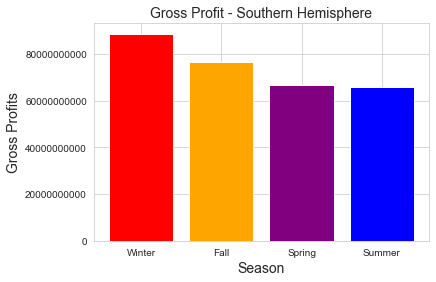

<BarContainer object of 4 artists>

Text(0.5, 1.0, 'Gross Profit - Northern Hemisphere')

Text(0.5, 0, 'Season')

Text(0, 0.5, 'Gross Profits')

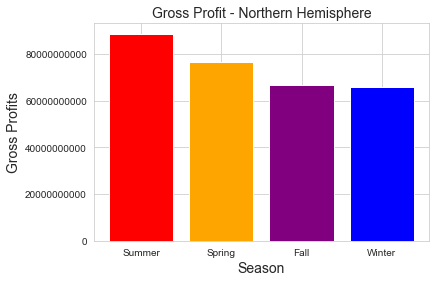

In [67]:
c = ['red', 'orange', 'purple', 'blue']
plt.bar(sProfits['Season_S_Hemis'], sProfits['Gross Profit'], color = c)
plt.title('Gross Profit - Southern Hemisphere', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Gross Profits', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

c = ['red', 'orange', 'purple', 'blue']
plt.bar(nProfits['Season_N_Hemis'], nProfits['Gross Profit'], color = c)
plt.title('Gross Profit - Northern Hemisphere', fontsize=14)
plt.xlabel('Season', fontsize=14)
plt.ylabel('Gross Profits', fontsize=14)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

## Gross Profit by Volume

The below output shows that the hypothesis is supported based on the number of films released in the respective seasons. Although, we have a higher release count during the Fall/spring relationship, we still see higher profits during the summer/winter and spring/fall relationship. 

In [75]:
# Northern Hemisphere Volume
nVolume = film_df.groupby(['Season_N_Hemis'])['Gross Profit'].agg(['sum','count']) \
.sort_values(by = ['sum'] , ascending=False).reset_index()

# Southern Hemisphere Volume
sVolume = film_df.groupby(['Season_S_Hemis'])['Gross Profit'].agg(['sum','count']) \
.sort_values(by = ['sum'] , ascending=False).reset_index()


nVolume
sVolume

,Season_N_Hemis,sum,count
0,Summer,88713360176,991
1,Spring,76500694757,963
2,Fall,66721753614,1199
3,Winter,65945499741,962


,Season_S_Hemis,sum,count
0,Winter,88713360176,991
1,Fall,76500694757,963
2,Spring,66721753614,1199
3,Summer,65945499741,962


## Summary

The objective of this project was to determine if colder seasons are more lucrative for film studios. Because movie titles are released worldwide it was important that we analyzed both domestic and international sales. In doing so, we found that the highest grossing films were released during the summer in the Northern Hemisphere (U.S market) and in the winter in the southern hemisphere. It is, however, important to note that there is a strong relationship between fall and spring and considering some of the outliers in the summer/winter relationships, film studios can expect high profit margins had they released during the spring/fall relationship as well. 

Some of the notable issues in compiling the data was that there weren't like identifier fields between both of the sources that were used for this analysis which in turn created duplicates at the point in which both data sets were merged. As a result, deduplicating the final dataset caused the unavoidable loss of data points that may have supported anyone of the findings presented in this analysis. 

Supplemental analysis would be with respect to movie runtimes and genres. Given the nature of how both datasets were merged, runtime also created duplicate records therefore needed to be removed from the dataset. IMDB sources stored Genres in threes which made it impossible to determine the main genre of any of the titles. Should we consider further analysis, identifying sources that note a title's main genre would make it sustainable and logical to include it in the analysis to further elaborate on what factors, business decisions are taken into account when releasing films at any given time. 